In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:

df[[ 'SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' ,'PetalWidthCm' ]] = df[['SepalLengthCm' , 'SepalWidthCm' ,'PetalLengthCm' , 'PetalWidthCm']].replace(0,np.NaN) 
print (df.isnull().sum())


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [10]:
print("Shape of the dataset(rows, columns):",df.shape)

Shape of the dataset(rows, columns): (150, 6)


In [11]:
print(df.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [12]:
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [13]:
print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


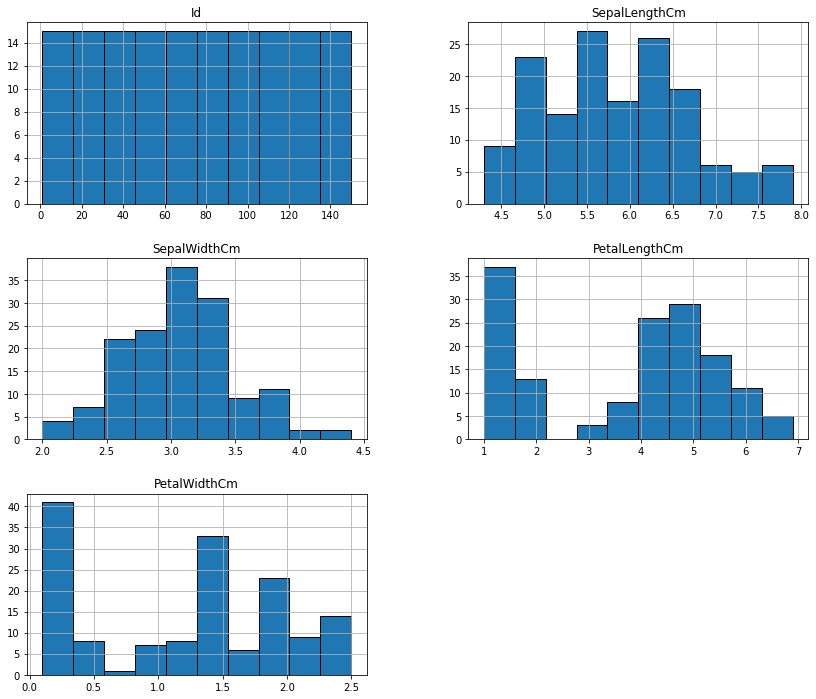

In [14]:
df.hist(edgecolor= 'black',figsize=(14,12)) 
plt.show() 

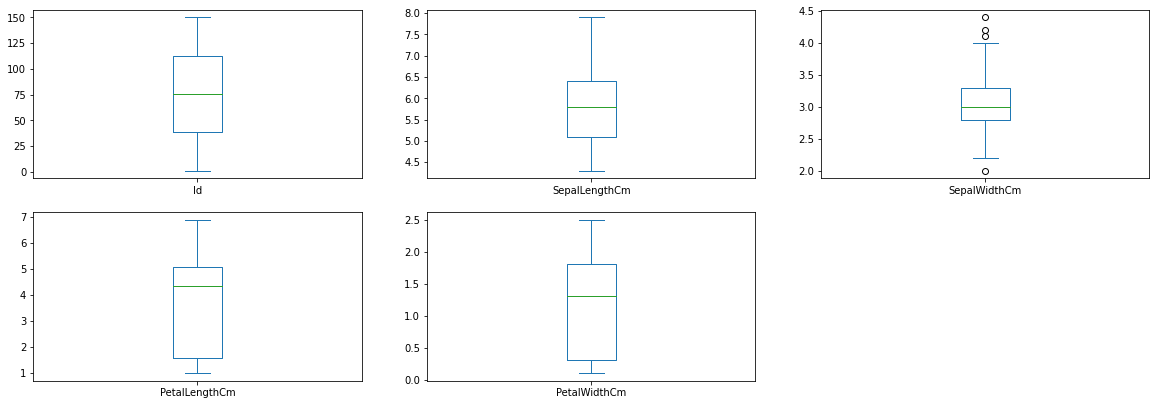

In [15]:
df.plot(kind="box", subplots=True, layout=(5,3), sharex=False, 
figsize=(20,18)) 
plt.show() 

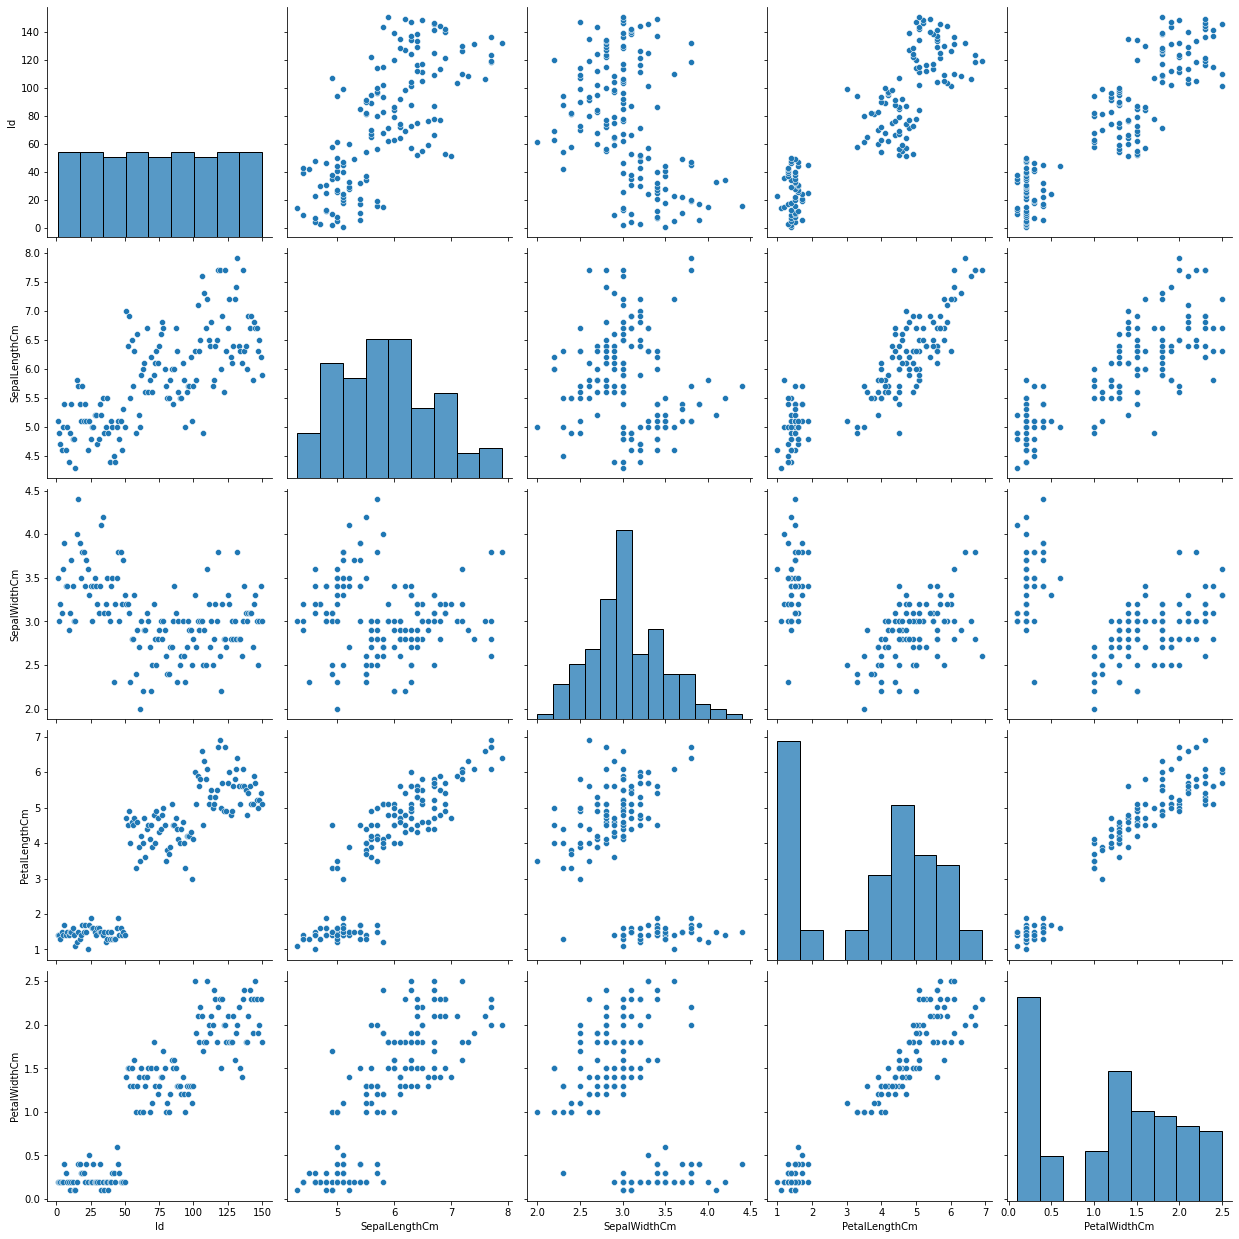

In [16]:
sns.pairplot(df, height=3.5); 
plt.show() 

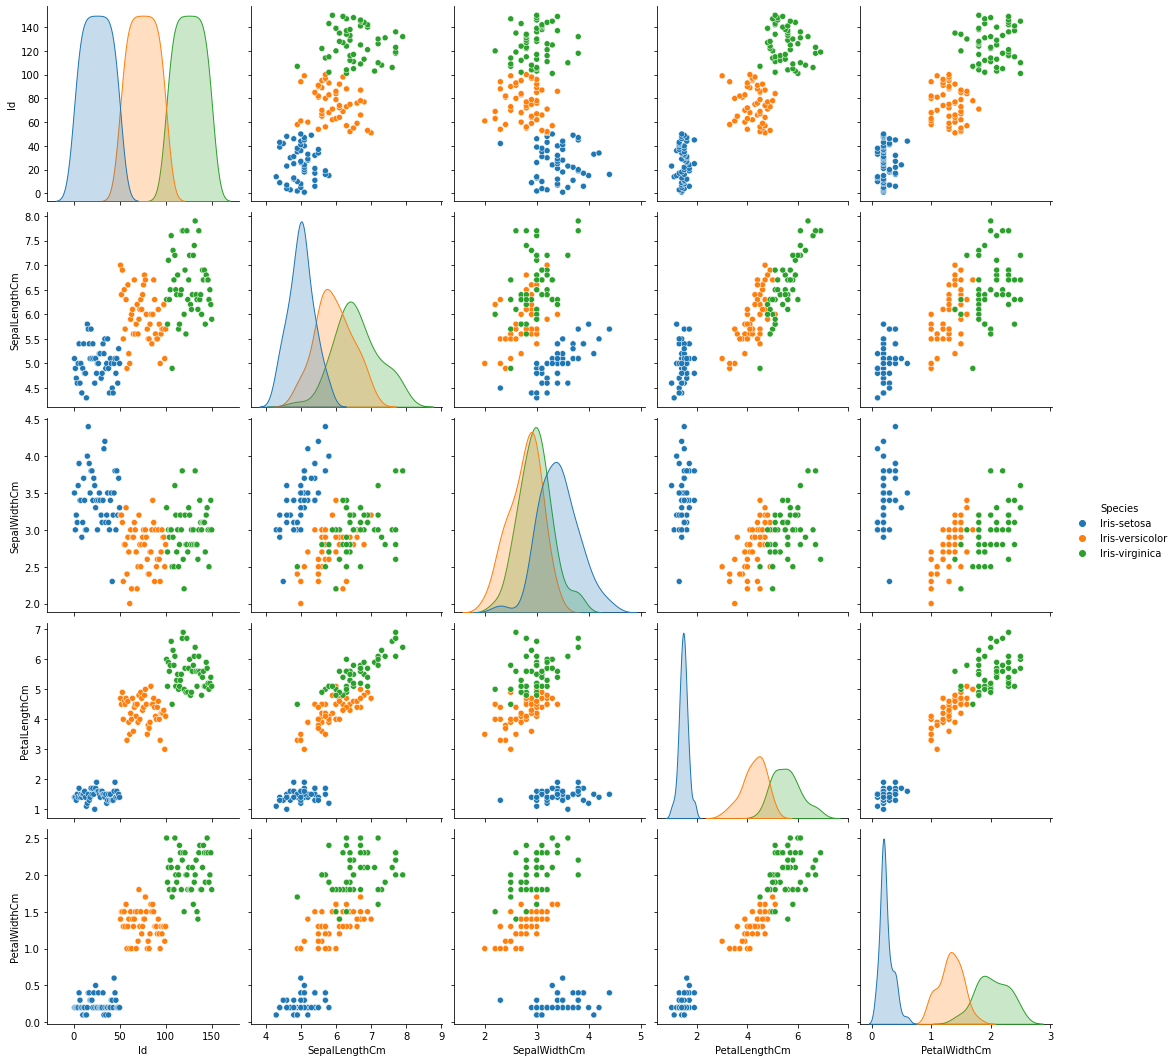

In [17]:
sns.pairplot(df, hue='Species', height=3, aspect= 1); 

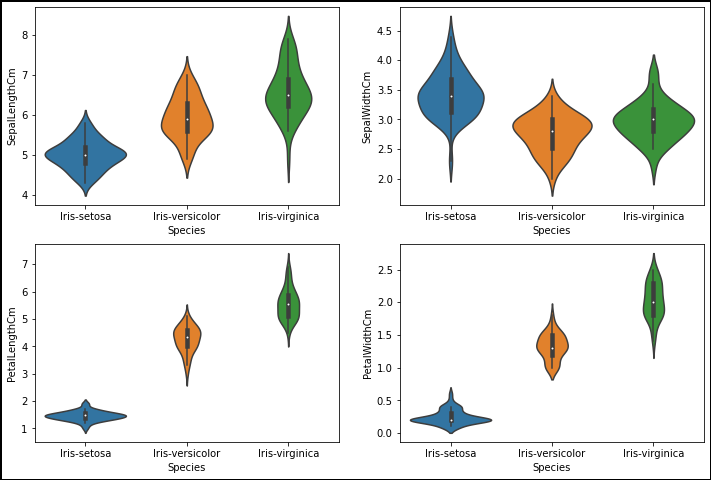

In [18]:
plt.figure(edgecolor="black", linewidth= 1.2,figsize=(12,8)); 
plt.subplot(2,2,1) 
sns.violinplot(x='Species', y = 'SepalLengthCm', data=df) 
plt.subplot(2,2,2) 
sns.violinplot(x='Species', y = 'SepalWidthCm', data=df) 
plt.subplot(2,2,3) 
sns.violinplot(x='Species', y = 'PetalLengthCm', data=df) 
plt.subplot(2,2,4) 
sns.violinplot(x='Species', y = 'PetalWidthCm', data=df); 
 

In [19]:
array = df.values
X = array[:,1:5]
Y = array[:,5]

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7) 

In [21]:
model = LogisticRegression(random_state=7, max_iter=1000)

In [22]:
model.fit(X_train, Y_train)
predicted = model.predict(X_test) 
report = classification_report(Y_test, predicted) 
print("Classification Report: ", "\n", "\n",report)

Classification Report:  
 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.89      0.89      0.89        18
 Iris-virginica       0.89      0.89      0.89        18

       accuracy                           0.92        50
      macro avg       0.93      0.93      0.93        50
   weighted avg       0.92      0.92      0.92        50



In [23]:
result = model.score(X_test, Y_test)
print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 92.000%


In [24]:
model.predict([[5.3, 3.0, 4.5, 1.5]])

array(['Iris-versicolor'], dtype=object)

In [25]:
model.predict([[5, 3.6, 1.4, 1.5]])

array(['Iris-setosa'], dtype=object)

In [26]:
n_splits=10
kfold=KFold(n_splits, random_state=7, shuffle=True)
scoring="accuracy"

In [27]:
results=cross_val_score (model, X, Y, cv=kfold, scoring=scoring) 
print("Accuracy: %.3f (%.3f)"% (results.mean(), results.std()))

Accuracy: 0.967 (0.054)
